In [128]:
import numpy as np # linear algebra 
import pandas as pd # data processing
# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [129]:
# Find the parent directories 
import os 
import sys 
sys.path.append(os.path.abspath(os.path.join('..')))

In [130]:
import scripts.preprocessing as p

In [131]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0

test_df['Survived'] = np.NAN
all_data = pd.concat([train_df, test_df])

%matplotlib inline 
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# Titanic Dataset Analysis Assumptions

When analyzing the Titanic dataset, it is important to consider several assumptions to ensure the analysis aligns with historical realities and provides meaningful insights. Below are the key assumptions to check:

## 1. Survival Rates by Class
- **Assumption**: Passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes (2nd and 3rd class).
- **Reality Check**: Historically, 1st class passengers had better access to lifeboats and were prioritized during evacuation.

## 2. Gender and Survival
- **Assumption**: Female passengers had a higher survival rate than male passengers.
- **Reality Check**: The "women and children first" protocol was followed, leading to higher survival rates for women.

## 3. Age and Survival
- **Assumption**: Children had a higher survival rate compared to adults.
- **Reality Check**: Children, especially those accompanied by women, were given priority during evacuation.

## 4. Family Size and Survival
- **Assumption**: Passengers traveling with family members had different survival rates compared to those traveling alone.
- **Reality Check**: Family groups might have had varied survival rates depending on their ability to stay together and access lifeboats.

## 5. Embarkation Point
- **Assumption**: The port of embarkation (Cherbourg, Queenstown, Southampton) might influence survival rates.
- **Reality Check**: This could be linked to the socio-economic status of passengers boarding at different ports.

## 6. Cabin Location
- **Assumption**: The location of a passenger's cabin (fore, midship, aft) could affect their chances of survival.
- **Reality Check**: Proximity to lifeboats and the point of impact with the iceberg could influence survival.

## 7. Socio-Economic Status
- **Assumption**: Socio-economic status, inferred from ticket class and fare, influenced survival chances.
- **Reality Check**: Higher socio-economic status often meant better access to lifeboats and quicker response during the disaster.

---

These assumptions can guide our analysis and help us to draw meaningful conclusions from the Titanic dataset.

### Understanding the nature of the data

In [132]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [133]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [134]:
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [135]:
num_col = train_df.describe().columns

In [136]:
# look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

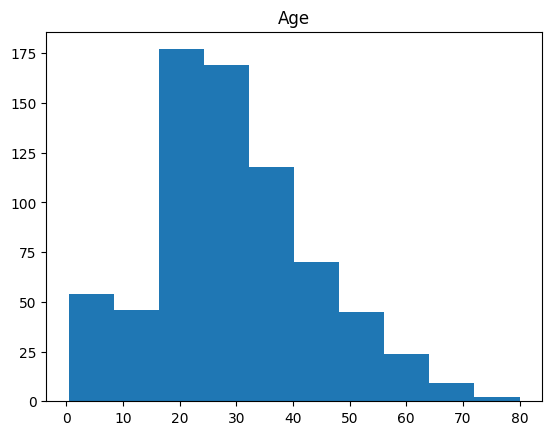

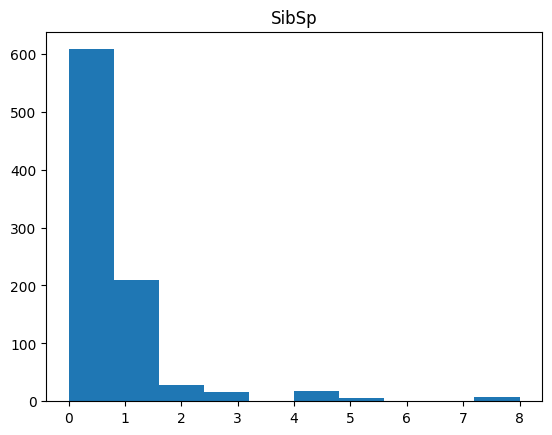

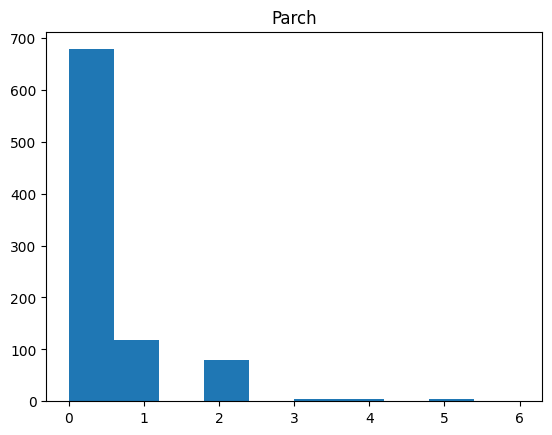

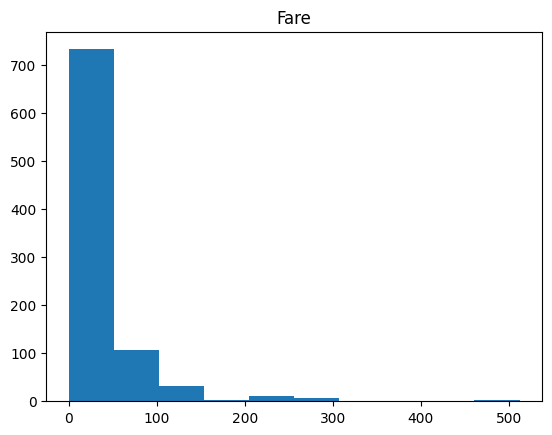

In [137]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

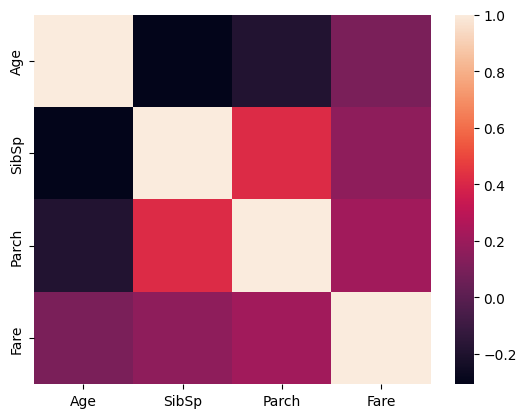

In [138]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [139]:
# Compare Survival rate across Age, Fare, Parch and SibSP
pd.pivot_table(train_df, index= 'Survived', values = df_num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


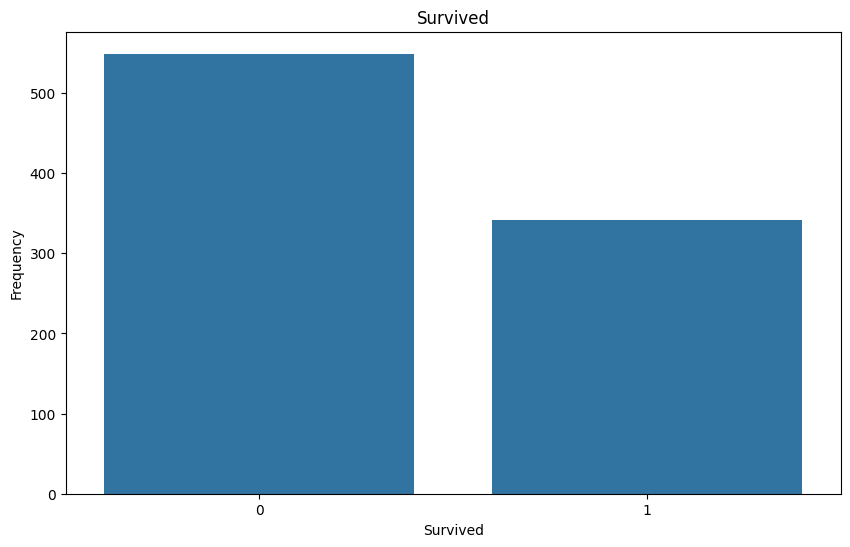

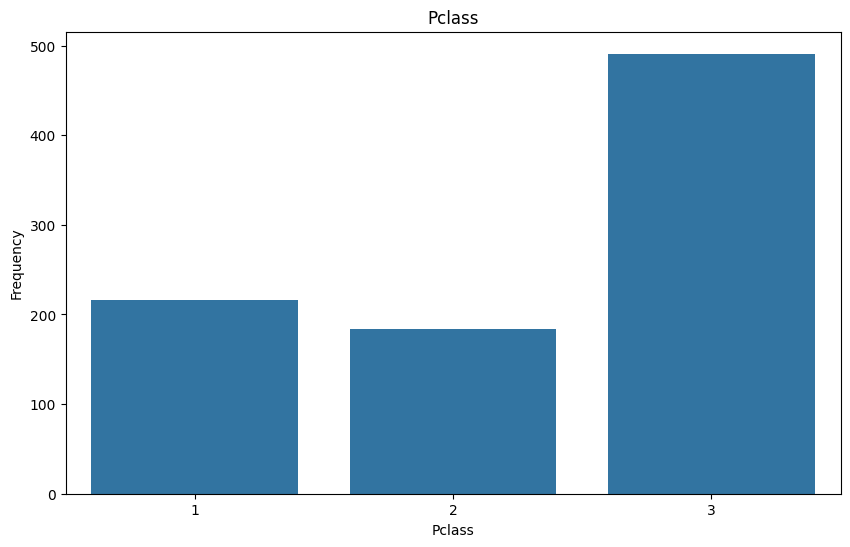

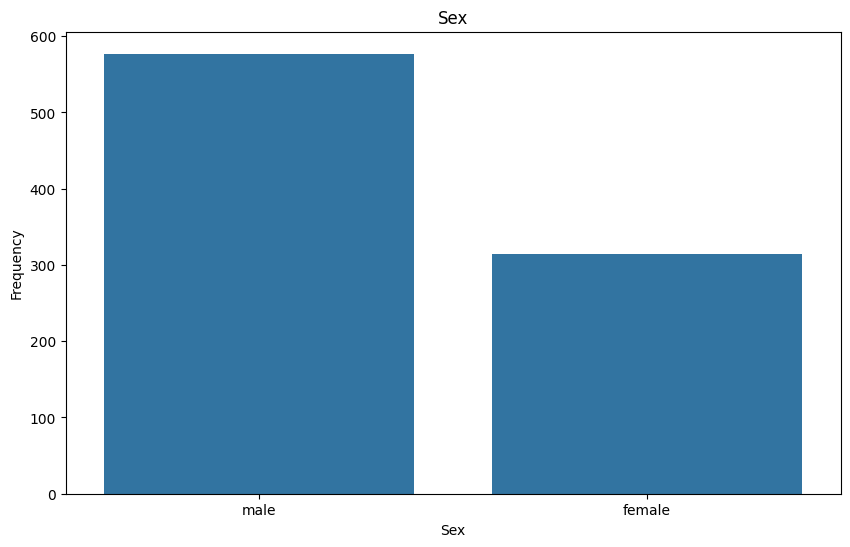

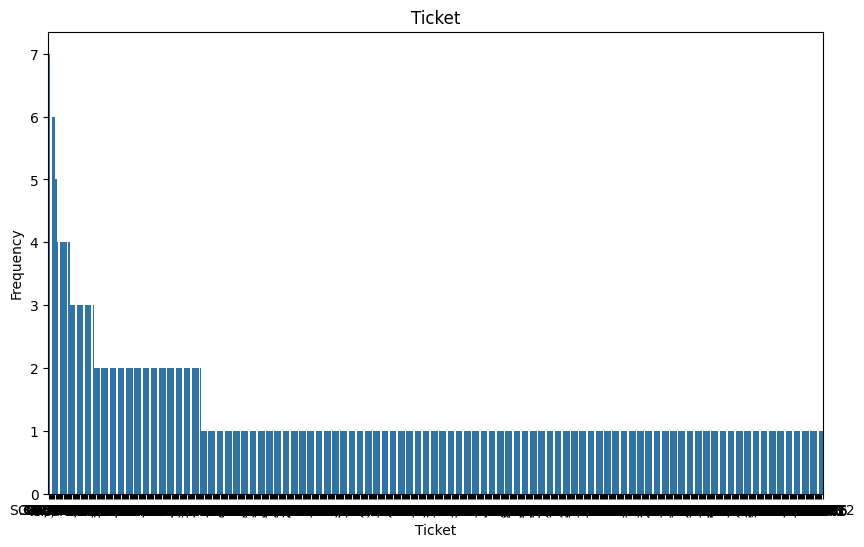

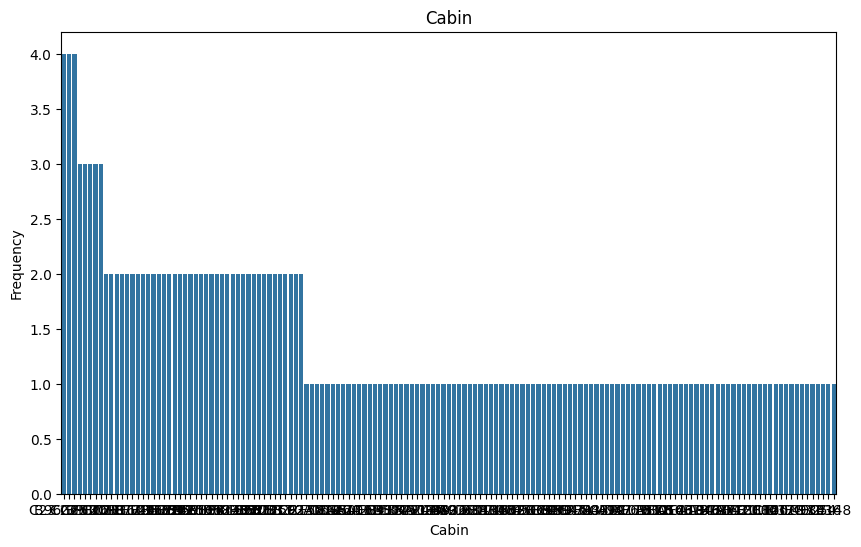

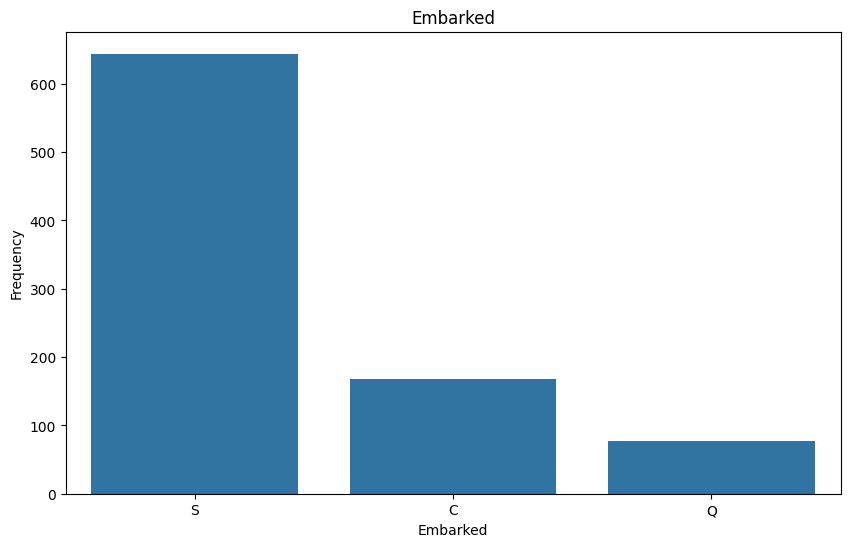

In [140]:
# Loop through all categorical columns and plot bar charts
for i in df_cat.columns:
    plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size for better visualization
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

Ticket and cabin are very messy so we have to do the feature enginerring on this area.

In [141]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [142]:
# Create the 'multiple_cabins' column
train_df['multiple_cabins'] = train_df['Cabin'].str.contains(r'\s', na=False)

# Filter and print rows with multiple cabins
multiple_cabins_df = train_df[train_df['multiple_cabins']]
multiple_cabins_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,multiple_cabins
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,True
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,1,True
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1,True
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1,True
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,True


In [143]:
df_cat.Cabin
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

train_df['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [144]:
pd.pivot_table(train_df, index = 'Survived', columns = 'cabin_multiple', values= 'Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### Creating a New Column Based on Cabin Letters

To categorize the cabins based on their initial letters, we can create a new column `cabin_category` in our DataFrame. This column will contain the first letter of each cabin entry, treating missing values as their own category.

In [145]:
# Create the 'cabin_category' column
train_df['cabin_category'] = train_df.Cabin.apply(lambda x: str(x)[0])

In [146]:
# Comparing Survival rate by cabin
print(train_df.cabin_category.value_counts())
pd.pivot_table(train_df, index='Survived', columns = 'cabin_category', values = 'Name', aggfunc='count')

cabin_category
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_category,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [147]:
#understand ticket values better 
#numeric vs non numeric 
train_df['numeric_ticket'] = train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_letters'] = train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).
                                                   replace('.','').replace('/','').lower() 
                                                   if len(x.split(' ')[:-1]) >0 else 0)

In [148]:
train_df.numeric_ticket.value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [149]:
pd.set_option("display.max_rows", None)
train_df['ticket_letters'].value_counts()

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [150]:
pd.pivot_table(train_df, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [151]:
pd.set_option("display.max_column", None)
pd.pivot_table(train_df, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Extracting Titles from Names
To better understand the titles within our dataset, we can extract them from the Name column. This involves splitting the name string by commas and periods to isolate the title. For example, from the name `Braund, Mr. Owen Harris,` we can extract the title `Mr.`

This process helps in categorizing passengers by their titles, such as `“Mr,” “Mrs,” “Miss,” etc.`, which can be useful for further analysis or modeling. By treating titles as a separate feature, we can gain insights into patterns and trends related to different passenger groups.

In [153]:
# Extract person title
train_df['title_name'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [154]:
# Print the title counts
train_df['title_name'].value_counts()

title_name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [155]:
# Survival based on title
pd.pivot_table(train_df, index = 'Survived', columns = 'title_name', values = 'Ticket', aggfunc = 'count')

title_name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Categorizing Titles by Gender and Age
Based on the distribution of titles in the dataset, I can further categorize them by gender and age:

| Title         | Gender | Age Group       |
|---------------|--------|-----------------|
| Mr            | Male   | Adult           |
| Miss          | Female | Young/Unmarried |
| Mrs           | Female | Married         |
| Master        | Male   | Young           |
| Dr            | Both   | Adult           |
| Rev           | Male   | Adult           |
| Mlle          | Female | Young/Unmarried |
| Major         | Male   | Adult           |
| Col           | Male   | Adult           |
| the Countess  | Female | Adult           |
| Capt          | Male   | Adult           |
| Ms            | Female | Adult           |
| Sir           | Male   | Adult           |
| Lady          | Female | Adult           |
| Mme           | Female | Married         |
| Don           | Male   | Adult           |
| Jonkheer      | Male   | Adult           |

### Categorizing Titles

Based on the distribution of titles in the dataset, I can categorize them into broader groups:

| Category            | Title          | Count |
|---------------------|----------------|-------|
| **Common Titles**   | Mr             | 517   |
|                     | Miss           | 182   |
|                     | Mrs            | 125   |
|                     | Master         | 40    |
| **Professional Titles** | Dr         | 7     |
|                     | Rev            | 6     |
| **Noble Titles**    | the Countess   | 1     |
|                     | Sir            | 1     |
|                     | Lady           | 1     |
|                     | Jonkheer       | 1     |
| **Military Titles** | Major          | 2     |
|                     | Col            | 2     |
|                     | Capt           | 1     |
| **Other Titles**    | Mlle           | 2     |
|                     | Mme            | 1     |
|                     | Ms             | 1     |
|                     | Don            | 1     |

This categorization helps in understanding the social and professional status of the passengers, which can be useful for further analysis or modeling.

### Analyze by visualization

#### 1. Survival Rates by Class

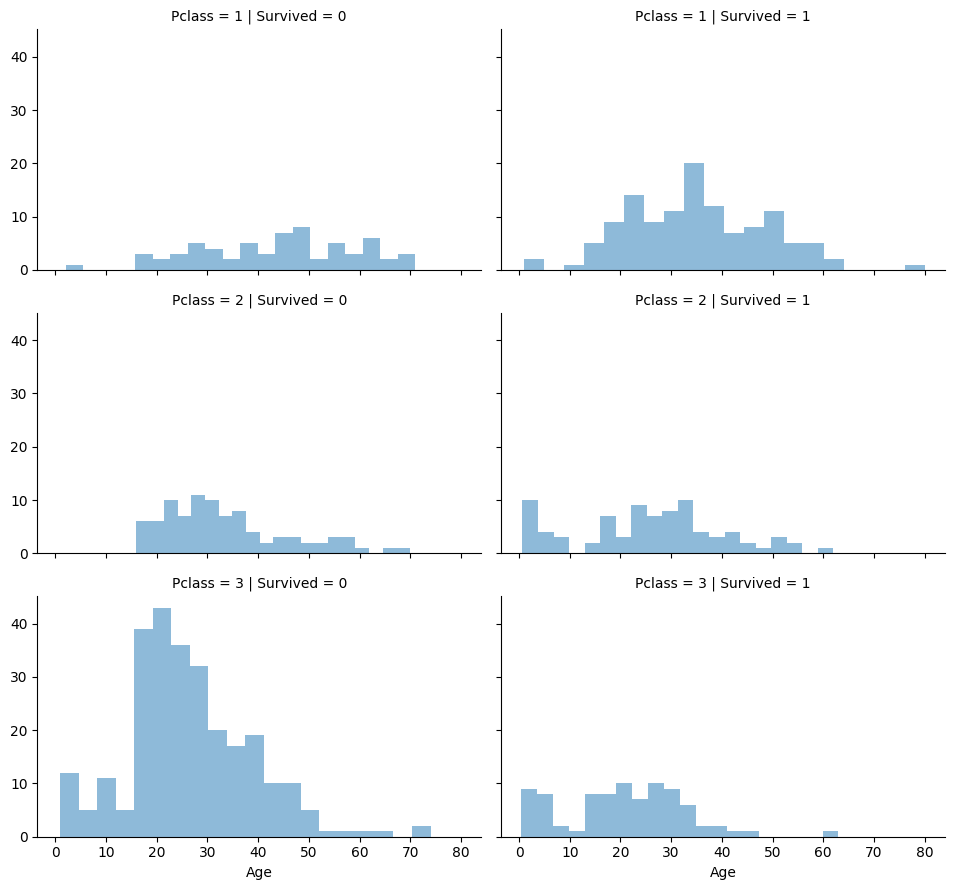

In [156]:
class_vis = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
class_vis.map(plt.hist, 'Age', bins=20, alpha=.5)
class_vis.add_legend()

## Correlating Numerical and Ordinal Features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

### Observations
1. **Pclass=3** had the most passengers; however, most did not survive. This confirms our classifying assumption #1.
2. **Infant passengers in Pclass=2 and Pclass=3** mostly survived. This further qualifies our classifying assumption #3.
3. **Most passengers in Pclass=1** survived. This confirms our classifying assumption #1.
4. **Pclass** varies in terms of the age distribution of passengers.


#### 2. Gender and Survival

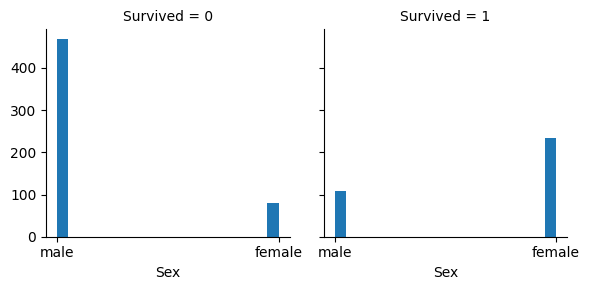

In [157]:
age = sns.FacetGrid(train_df, col='Survived')
age.map(plt.hist, 'Sex', bins=20)

##### Observations:
 * Female are more survival rate than men.

### 3. Age and Survival

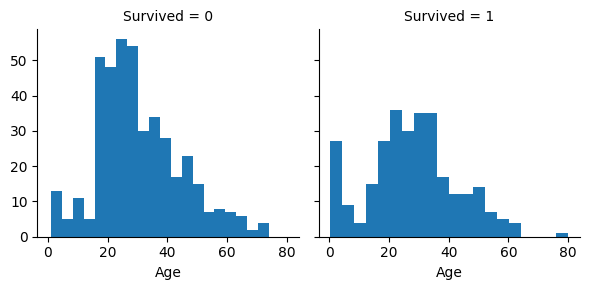

In [158]:
age = sns.FacetGrid(train_df, col='Survived')
age.map(plt.hist, 'Age', bins=20)

<function matplotlib.pyplot.show(close=None, block=None)>

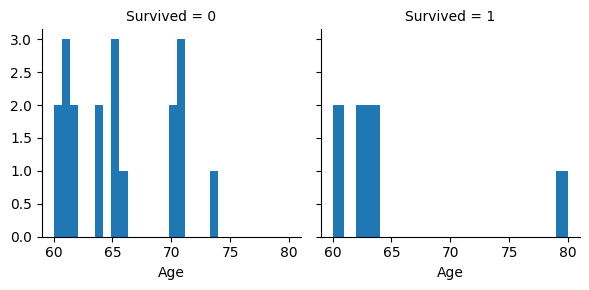

In [159]:
age = sns.FacetGrid(train_df[train_df['Age'] >= 60], col='Survived')
age.map(plt.hist, 'Age', bins=20)
plt.show

Percentage of elderly passengers (age 60 and above): 2.92%


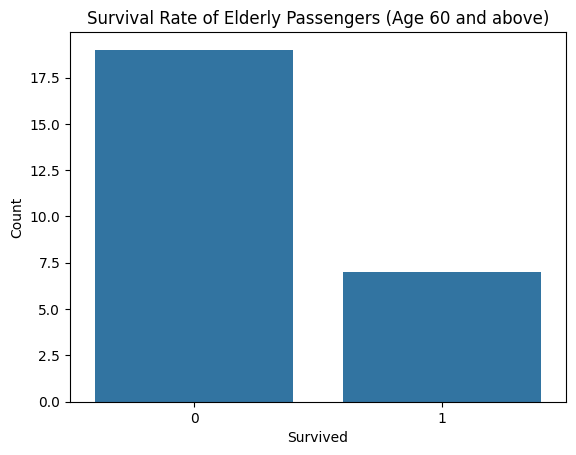

Survival rate of elderly passengers (age 60 and above): 26.92%


In [160]:
# Define elderly passengers as those aged 60 and above
elderly_passengers = train_df[train_df['Age'] >= 60]

# Calculate the total number of passengers
total_passengers = train_df.shape[0]

# Calculate the number of elderly passengers (age 60 and above)
elderly_passengers1 = train_df[train_df['Age'] >= 60].shape[0]

# Calculate the percentage of elderly passengers
percentage_elderly = (elderly_passengers1 / total_passengers) * 100
print(f'Percentage of elderly passengers (age 60 and above): {percentage_elderly:.2f}%')

# Plot the survival rate of elderly passengers
sns.countplot(x='Survived', data=elderly_passengers)
plt.title('Survival Rate of Elderly Passengers (Age 60 and above)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Calculate the survival rate for elderly passengers
elderly_survival_rate = elderly_passengers['Survived'].mean() * 100
print(f'Survival rate of elderly passengers (age 60 and above): {elderly_survival_rate:.2f}%')


### Findings on Age and Survival

- **Children (0-10 years)**: Higher survival rate compared to other age groups.
- **Young Adults (20-30 years)**: Largest group among both survivors and non-survivors, but fewer survivors in this age range.
- **Elderly (around 80 years)**: Very high survival rate.

These observations align with historical realities and our initial assumptions.


#### 4. Family Size and Survival

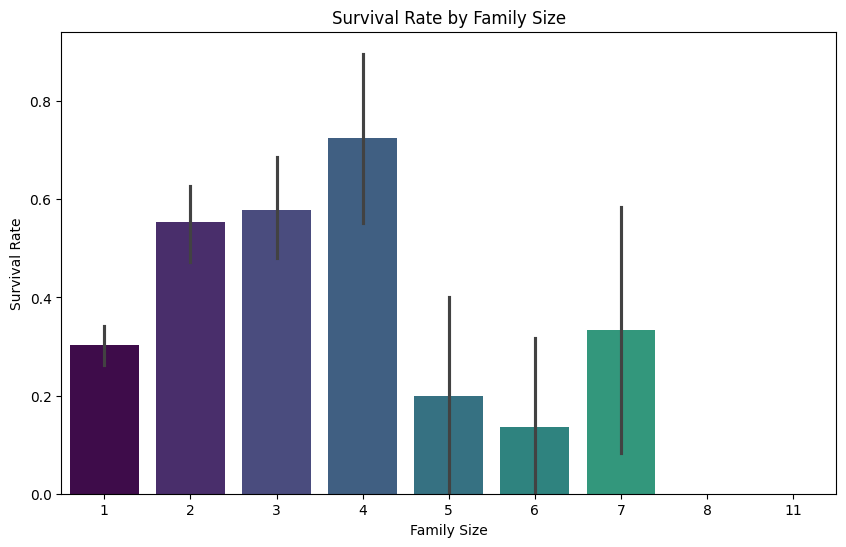

In [161]:
# Assuming train_df is your DataFrame
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Plotting survival rate by family size
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_df, palette='viridis', hue='FamilySize', legend=False)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

##### Observations:
 - `Family Size 1`: Individuals traveling alone had a `lower` survival rate.
 - `Family Sizes 2, 3, and 4`: These groups had the `highest` survival rates, suggesting that having a few companions increased chances of survival.
 - `Family Sizes 5 and above`: Survival rates `decreased` significantly for `larger` families, with more variability.
- This pattern indicates that while having some family members around could be beneficial during the disaster, very large families might have faced more challenges.

### 5. Embarkation Point

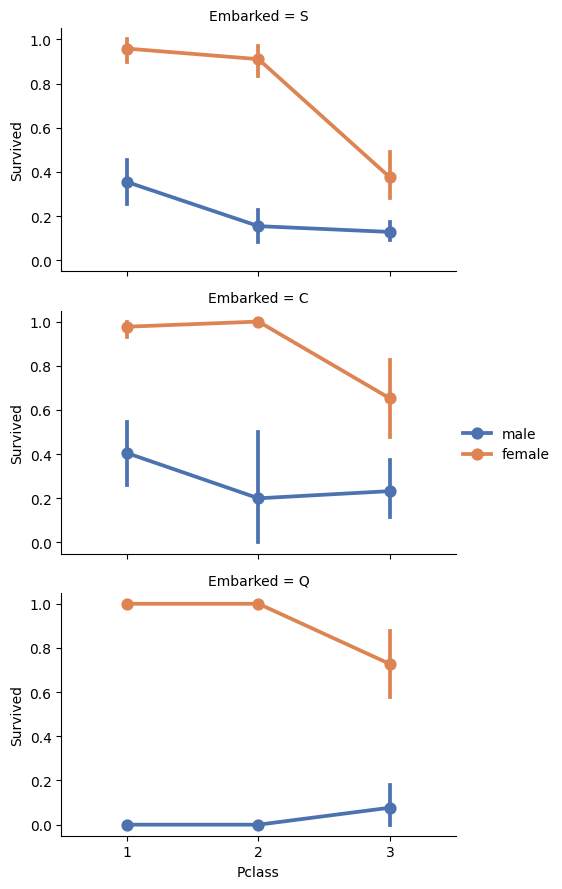

In [162]:
# Create the FacetGrid
sex = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
sex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', hue_order=['male', 'female'], order=[1, 2, 3])
sex.add_legend()

##### Observations
1. Female passengers had a much better survival rate than males across all classes and ports of embarkation.
2. Exception in Embarked=C: Males had a higher survival rate in first class compared to other classes, indicating a possible correlation between Pclass and Embarked, rather than a direct correlation between Embarked and Survived.
3. Males had better survival rates in Pclass=3 compared to Pclass=2 for ports C and Q.
4. Ports of embarkation show varying survival rates for Pclass=3 and among male passengers.

### 6. Cabin Location

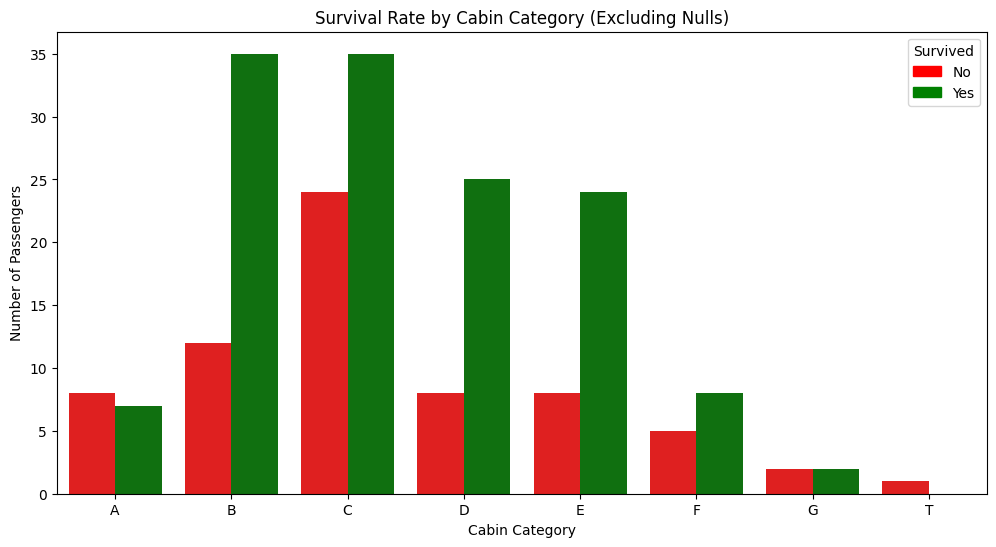

In [163]:
# Create custom legend handles
green_patch = mpatches.Patch(color='green', label='Yes')
red_patch = mpatches.Patch(color='red', label='No')

# Filter out rows where cabin_category is 'n'
filtered_df = train_df[train_df['cabin_category'] != 'n']

# Count the number of passengers in each cabin category
cabin_counts = filtered_df['cabin_category'].value_counts()

# Create a pivot table to count the number of survivors and non-survivors for each cabin category
survival_pivot = pd.pivot_table(filtered_df, index='Survived', columns='cabin_category', values='Name', aggfunc='count')

# Reset the index to make 'Survived' a column
survival_pivot = survival_pivot.reset_index()

# Melt the pivot table to long format for easier plotting
survival_melted = survival_pivot.melt(id_vars='Survived', var_name='Cabin', value_name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=survival_melted, x='Cabin', y='Count', hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Survival Rate by Cabin Category (Excluding Nulls)')
plt.xlabel('Cabin Category')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', handles=[red_patch, green_patch])
plt.show()

The letters in the Titanic’s cabin designations represent different decks on the ship. Here’s a brief overview:

1. A Deck: Also known as the Promenade Deck, it was the uppermost deck with cabins, primarily for first-class passengers.
2. B Deck: Also called the Bridge Deck, it housed first-class cabins and some public rooms.
3. C Deck: Known as the Shelter Deck, it contained first-class cabins and some second-class cabins.
4. D Deck: The Saloon Deck, which had first-class dining saloons and cabins, as well as some second-class cabins.
5. E Deck: The Upper Deck, which had a mix of second-class cabins and crew accommodations.
6. F Deck: The Middle Deck, primarily for third-class passengers and crew.
7. G Deck: The Lower Deck, which had third-class cabins and cargo spaces.
8. T Deck: This was a unique and rare designation, with only one cabin (T) known, possibly a special or temporary cabin.

##### Observations:
1. Cabin B:
 * Higher Survival Rate: Cabin B shows a significantly higher number of survivors compared to non-survivors. This aligns with the fact that B Deck housed first-class cabins, which likely had better access to lifeboats and safety measures.
2. Cabin D:
 * Balanced but Favorable: Cabin D also shows a higher number of survivors, though the difference is not as pronounced as in Cabin B. This deck included first-class dining saloons and cabins, which might have contributed to better survival chances.
3. Cabin C:
 * Moderate Survival Rate: Cabin C has a relatively balanced number of survivors and non-survivors, with a slight edge towards survival. This deck contained both first and second-class cabins.
4. Cabin E:
 * Equal Survival and Non-Survival: Cabin E shows an almost equal number of survivors and non-survivors, indicating no significant advantage or disadvantage in terms of survival.
5. Cabin A:
 * Lower Survival Rate: Despite being on the uppermost deck, Cabin A has a lower number of survivors compared to non-survivors. This might be due to the smaller number of passengers in this category.
6. Cabin F and G:
 * Lower Survival Rates: Both cabins F and G show more non-survivors than survivors. These decks were primarily for third-class passengers and crew, who had less access to lifeboats and safety measures.
7. Cabin T:
 * Unique Case: With only one passenger, it’s difficult to draw any meaningful conclusions from Cabin T.
These insights suggest that the class and location of the cabins had a significant impact on the survival rates. Passengers in first-class cabins (B, D) had better survival chances, likely due to their proximity to lifeboats and priority in evacuation procedures.



### 7. Socio-Economic Status

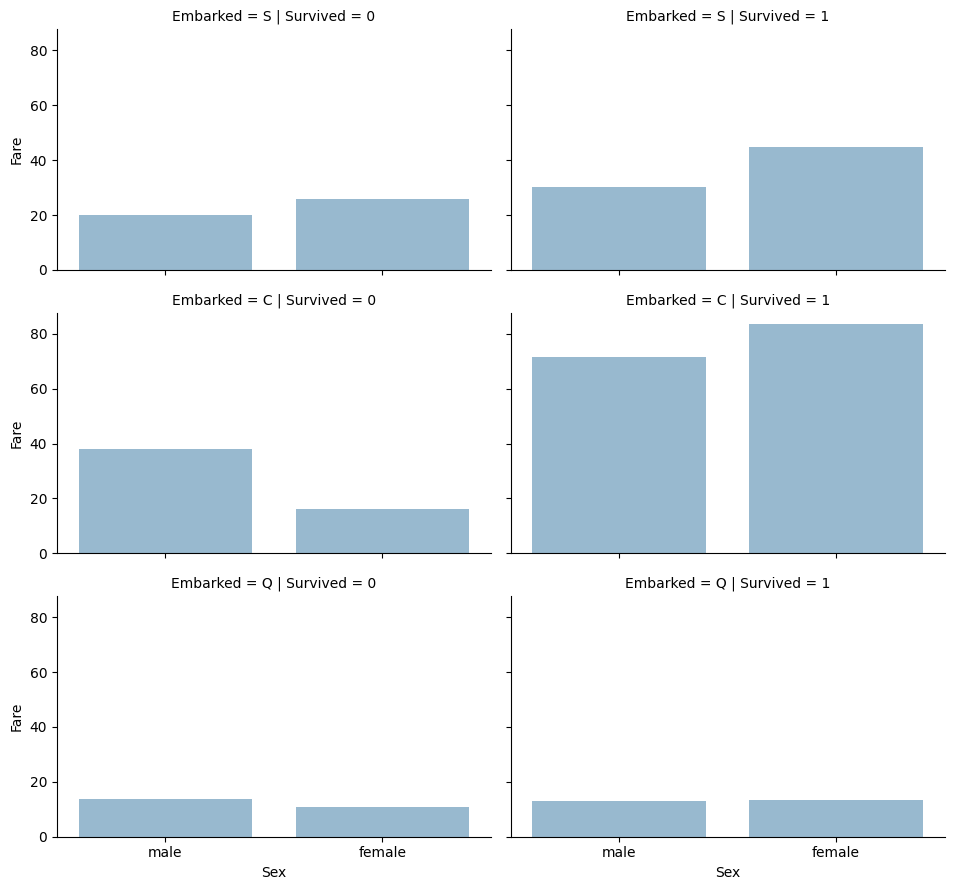

In [164]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)

# Update the barplot function
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None, order=['male', 'female'])

# Add legend
grid.add_legend()

# Show plot
plt.show()

#### Findings:
* **Survival Rates**:
  * Passengers who paid higher fares had a higher survival rate. This trend is consistent across all fare categories.
  * The survival rate decreases as the fare decreases, indicating that passengers in lower fare categories had a lower chance of survival.
* **Comparison by Fare**:
  * The highest fare category shows a significant difference in survival rates, with a larger number of survivors compared to non-survivors.
  * In contrast, the lowest fare category has more non-survivors than survivors.

## Data Preprocessing

In [165]:
p.calculat_missing_percentage(all_data)

The dataset has 9.98% missing values.


In [166]:
p.check_missing_values(all_data)

,Missing Values,% of Total Values,Data Types
Cabin,1014,77.46,object
Survived,418,31.93,float64
Age,263,20.09,float64
Embarked,2,0.15,object
Fare,1,0.08,float64
PassengerId,0,0.00,int64
Pclass,0,0.00,int64
Name,0,0.00,object
Sex,0,0.00,object
SibSp,0,0.00,int64


In [167]:
# Create all featuring we did avove on training data now on both trining and test data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_category'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['title_name'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

<Axes: >

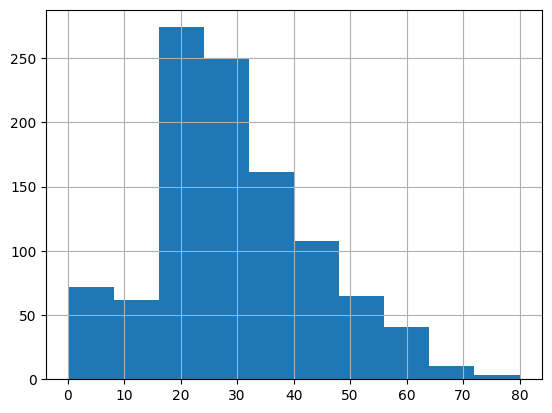

In [168]:
all_data['Age'].hist()

#### Filling Missing Age Values
Given the skewed distribution of ages, it’s recommended to fill the missing values in the Age column with the `median`. This approach is less affected by *outliers* and provides a more accurate representation of the *central tendency*.

In [169]:
# Fill missing values in the age column with median 
all_data.fillna({'Age': all_data['Age'].median()}, inplace=True)

In [170]:
all_data.fillna({'Fare': all_data['Fare'].median()}, inplace=True)

In [171]:
all_data['Embarked'].isnull().sum()

2

Only two instances of in embarked columns has data is null

In [172]:
all_data.dropna(subset=['Embarked'], inplace=True)

(889,)

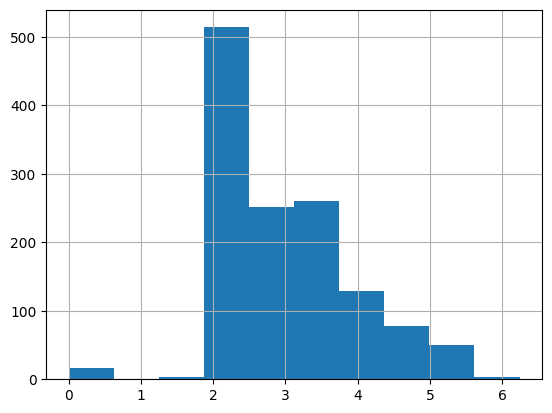

In [175]:
# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_category','cabin_multiple','numeric_ticket','title_name','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [176]:
# Save claned data to csv file
all_data.to_csv('../data/all_data.csv', index=False)
train_df.to_csv('../data/train_cleaned.csv', index=False)
